# __IBM Employee Attrition Study__

This notebook follows an exploration of the attrition of IBM Employees. Given a dataset of of employee information, can we make strong predictions wether they will stay at the company or not?

## __Defining our Objectives__

While our data exploration will be largely open-ended, we should have some overall goals in mind as we tread into uncharted territory:

- [x] Get a high-level understanding of our dataset and its features
- [x] Conduct a multivariate analysis to look for patterns and corellations in the data
- [x] Develop key insights on how the features affect an employee's attrition status
- [x] Implement a machine learning model to see how effectively we can make predictions

## 0. Imports and Configurations

In [1]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'


import os
print(os.listdir("./data/"))

['WA_Fn-UseC_-HR-Employee-Attrition.csv']


## 1. Loading the Dataset and High-Level Overview

Our first steps are to load in our csv file as a ```pandas``` DataFrame and to take a quick look at the entire dataset. We want to understand the features we will be working with as well as see how they are represented.

In [2]:
DATA_PATH = "data/WA_Fn-UseC_-HR-Employee-Attrition.csv"

In [3]:
df = pd.read_csv(DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### __Analysis__

We have 1,470 entries in our dataset and 35 columns/features, including that of _Attrition_. 

Of the 35 features, most are __quantitative__ represented by the ```int64``` data type. The rest are __categorical__, but we can make some useful abstractions for most of them:

Features such as _Arttrition_, _Gender_, _Over18_, and _OverTime_ represent __binary categorical__ data. These are easy to represent numerically as 1 or 0.

_Business Travel_ is an object but also is __ordinal__, meaning it represents an ordered structure of data. We can make this inference because it represents 3 values of increasing amount in travel: _Non Travel_, _Travel Rarely_, and _Travel Frequently_.

__Thoughts So Far__

We are fortunate to work with a rather clean and straight-forward dataset. Some basic visualization techniques should help point out if we have any need for data cleaning

## 2. Preliminary Visualization and data cleaning

__Is this a balanced dataset?__

One of the first things that will be useful to understand right away is wether we have a balaned dataset. Essentially, we are checking if we gathered roughly equal data for both employees who have left the company and for those who have stayed. Lets take a quick look:

No     1233
Yes     237
Name: Attrition, dtype: int64


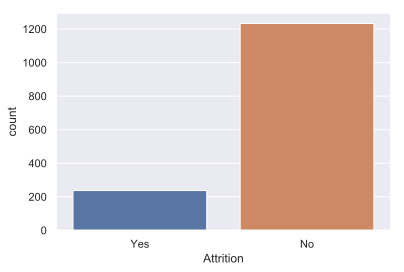

In [5]:
print(df['Attrition'].value_counts())
sns.countplot(df['Attrition']);

__So no. Our dataset is inbalanced.__ Why do we care about this?

1. Building machine learning predictions will be more difficult, as answers will be more biased towards 'no'.
2. Our own inferences need to be carefully considered when looking for patterns in 'Yes' results for Attrition. We cannot mix up _causation_ for _correlation_

### Filtering Categorical and Numerical Features

* We'll want to apply the right kind of visualizations depending on the type of feature, so its a good idea to create filters for them when accessing the dataframe:

In [6]:
# Filter Data
numerical, categorical = [], []

for col in df.columns:
    if (df[col].dtype == 'O') or (len(df[col].value_counts()) < 10):
        categorical.append(col)
    else:
        numerical.append(col)

Now that we have these forms of data seperates, let us take a further look into them and see if we need to do any cleaning or if there is some valuable information to be obtained

### Inspection of Numerical Data

A good starting point for our quantitaive data will be to create a heatmap that will look for correlations in our data. As stated above, we need to becareful in mixing up _causation_ with _correlation_, but it could provide some leads for further exploration

We have a lot of numerical columns to create correlations for, so its hard to visualize all of them in one grid. Instead, we can look at the majority first and see if there is anything peculiar about the data:

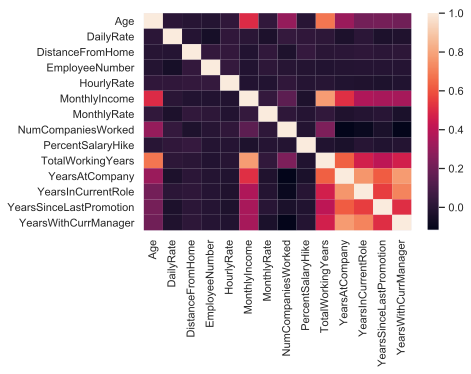

In [7]:
# Creating a correlation matrix
corr_matrix = df[numerical].corr()
# Plotting heatmap
sns.heatmap(corr_matrix);

There are some logical conclusions we can draw from looking at our new heatmap:

- _Monthly Income_, _Job Level_, and _TotalWorkingYears_ are strongly related. _Age_ is also related to _MonthlyIncome_.
- _YearsWithCurrentManager_ is tied with _YearsWithCurrentRole_ and _YearsAtCompany_

Later we can confirm wether or not they influence attrition by directly comparing features, as well as other categorical pieces of data.

Speaking of categorical data, lets move on to inspecting those features to be sure that we properly understand them.

### Inspection of Categorical Data

At the beginning of this visualization section, we already took a look at the distribution of our target categorical feature, _attrition_. We saw that we had an inbalanced dataset biased towards employees staying at the company. 

Lets look at the distribution of data for our categorical features. Our first interest is to see if there are any columns where there is only 1 value. Why? If we find such a column, that would make that feature of no use to us: we don't know how it would impact _attrition_

In [8]:
for col in categorical:
    if len(df[col].value_counts()) < 2:
        print(col)

EmployeeCount
Over18
StandardHours


Our inference was correct! The columns have a single value across all employee entrees. Since these features are not providing us any further insight on attrition, we will drop them.

__*Note on dropping features*__: The choice to get rid of valid data columns from your analysis should not be taken lightly. Usually, we need to ask practical and realistic questions around the features we are looking at: Will we receive more data in the future? If so, we could possible see varying data ranges in these columns which could affect our analysis. In this case, we know we will not receive any additiondal data, which is why we safely made the choice to get rid of these columns.

In [9]:
# Dropping the columns
df = df.drop(columns=['EmployeeCount', 'Over18','StandardHours'])
# Updating our numerical features to not include the dropped columns
categorical = list(set(categorical) - set(['EmployeeCount', 'Over18','StandardHours']))

Let us now see how some key features in our categorical set could affect attrition. Here is a refresher list for our categorical features:

In [10]:
categorical

['PerformanceRating',
 'Education',
 'EducationField',
 'Attrition',
 'TrainingTimesLastYear',
 'JobInvolvement',
 'BusinessTravel',
 'JobLevel',
 'OverTime',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'Gender',
 'Department',
 'WorkLifeBalance',
 'MaritalStatus',
 'JobRole',
 'JobSatisfaction',
 'EnvironmentSatisfaction']

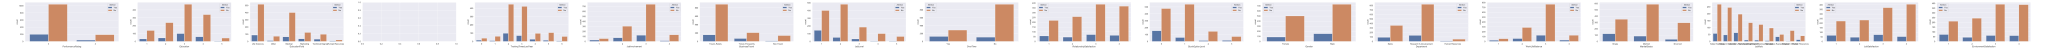

In [11]:
_, axes = plt.subplots(nrows=1, ncols=(len(categorical)), figsize=(200, 4))
for i,col in enumerate(categorical):
    if col != 'Attrition':
        sns.countplot(x=col, hue='Attrition', data=df, ax=axes[i])

Some observations from our plots above:

- __Education Field__: Proportionally; Marketing, Technical Degree, and Human Resources employees have higher chances of leaving the company.
- __Department__: Employees in the Sales department have the highest chance of leaving the company, roughly about a _25% chance_.
- __Business Travel__: Those who travel frequently have a higher chance of leaving the company. Many of these employees could possibly be in the same group as the _Sales Department_, as sales positions usually require more travel.
- __Stock Option Level__: The lower your stock option level, the higher chance you have of belonging to the attrition group.
- __Work-Life Balance__: The minority group who rate poorly on Work-Life Balance have roughly a _50% chance_ of leaving IBM.
- __Job Level__: The lower your job level, the higher chance you have of belonging to the attrition group. Seems to be highly correlated to _StockOptionLevel_.
- __PerformanceRating__: Interestingly, there does not seem to be a higher probability of attrition for an employee who has a lower performance rating. It should be noted, however, that most employees who left the company do have lower performance ratings. Later we can take a second look at the ratios to confirm this.
- __OverTime__: If an employee clocks in for overtime, they have a significant chance of eventually leaving the company. This seems to have a logical relationship with _WorkLifeBalance_ as well.
- __JobRole__: With our current graph visualization, it is difficult to see the distribution of attrition per job role. We will take a look at this graph seperately.
- __MaritalStatus__: Those employees who are _Single_ have a considerable chance of leaving IBM. It would be reasonable to assume that these individuals are also young who have a low _JobLevel_ and a low _StockOptionsLevel_. We can confirm this later with more exploration.
- __TrainingTimesLastYear__: For those employees who engaged in some kind of training, they have a lower chance of leaving the company. However, those who did not engage in training seem to have a higher chance.
- __RelationshipSatisfaction__: While not significant, those employees with a low relationship satisfaction tend to belong to the attrition group more than those who do not. This naturally goes hand-in-hand with _WorkLifeBalance_
- __JobInvolvement__: Employees in the smallest group of Job Involvement have a significant chance of leaving IBM.

We just gained a lot of insight! While not a perfect picture, we can now form some hypothesis to determine the kinds of employees who leave IBM. 

## __3. Key Insights__

What makes an employee leave the company? As one could expect from the data, there is no one single decisive factor. However, we have spotted some key features that could play some influence in attrition. Mainly:

- Does the employee have poor work-life balance? Do they work overtime, and have low relationship satisfaction?
- Is the employee at a low-ranking position within the company, with little to no stock options?
- Is the employee in a sales related job which contains much travel?
- Is the employee young and single? If so, are they also in a low-ranking position?
- Does the employee score low on Job Involement?

Having an individual answer _yes_ to one or many of these questions could potentially put them at very high risk of leaving the company. 

__*An Important Note on "Attrition":*__ While it may seem obvious we have not discussed the greatest weakness of our _Attrition_ metric, let us address it now. _Attrition_ could represent an individual _choosing_ to leave the company and could also represent them being _fired_ from the company. These two scenarios represent entirely different symptoms within an employee's data. With our questions on _Attrition_, we are making sure to cover both scenarios.

## __4. Machine Learning Predictions__

For now, we will move forward with preparing our dataframe for machine learning predictions. This is actually a large process which we will need to break down into several smaller steps:

1. _Features Engineering_: where we make our data easier to be processed for mathematical computation
2. _Train-Test Data Split_: Divide our dataset into two sections, for training and testing ML models
3. _Test_: Use different ML models and analyze the results

### 4.1 Features Engineering

In a supervised machine learning problem, such as this one, we have our input features, denoted by __X__, and a __target__ variable, usually denoted by __y__.

What does this mean? Based on labeled information for each employee, we know ahead of time their _attrition_ status. In this case, since we are trying to predict _attrition_, that becomes our target variable. All other features in the data become our X.

To begin our ML work, we are going to create a duplicate dataframe and drop the _Attrition_ column, since this is what we will be attempting to predict:

In [12]:
df_processed = df.drop(columns=['Attrition'])

__Encoding our categorical object Features__

To easily process our data, we will transform our categorical object columns with a techqniue called __one hot encoding__. This will turn our categories into vector representations of data that a machine learning algorithm will be able to understand.

Again, we will filter out our columns that are object types verses the int types:

In [13]:
objects, numbers = [], []

for col in df_processed.columns:
    if (df_processed[col].dtype == 'O'):
        objects.append(col)
    else:
        numbers.append(col)

The *get_dummies* method from Pandas will allow us to do one hot encoding

In [14]:
df_object = df_processed[objects]
df_object = pd.get_dummies(df_object)

In [15]:
df_object.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


Fantastic! Now we have representations for our cateogircal data that an ML algorithm will be able to compute easily. Lets concat a final dataframe with our numerical values and categorical ones:

In [16]:
df_final = pd.concat([df_processed[numbers], df_object], axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


__Setting Up the Target__

_Attrition_ is defined by a string, 'Yes' or 'No'. As mentioned earlier in this study, we can transform binary features from their abstract concepts of 'Yes' or 'No' into 1 or 0. 

In [17]:
target = df['Attrition'].map({'Yes': 1, 'No': 0})

### 4.2 Creating the Train-Test Split

Even though we will be using the magic (actually it's just a lot of math) of machine learning to create our predictions, we will need a way to _test_ if we are creating accurate models! This is the purpose of the _train-test split_.

In [18]:
# Importing train-test split method from sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

Let us now split up our data:

In [19]:
train_X, test, train_y, val_y = train_test_split(df_final, target, train_size=0.9, random_state=0);

__SMOTE: Dealing with our inbalanced dataset__

As mentioned several times, our target data is inbalanced. A majority of the employees in the our data have not left IBM, making attrition easily a biased prediction to make for an algorithm

The Synthetic Minority Oversampling Technique, or SMOTE for short, will allow us to take this in account for our training data:

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
oversampler = SMOTE(random_state=0)
smote_X, smote_y = oversampler.fit_sample(train_X, train_y)

### 4.3 Building a Model: The Random Forest Classifier

A Random Forest is a type of machine learning method based on decision trees. Using the power of an ensemble of decision trees, a random forest can put together powerful learning algorithms for predicting data. 

First, we will import a Random Forest from sklearn and set up its parameters:

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

/Users/jonaserthal/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : 0,
    'verbose': 0
}

Now to initialize a random forest with the above parameters:

In [24]:
random_forest = RandomForestClassifier(**params)

And we can finally begin to fit our random forest to the training data:

In [25]:
random_forest.fit(smote_X, smote_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Our random forest has been fitted to the training data! Lets make some predictions based on the tests, and measure up how we compare to the actual results:

In [26]:
predictions = random_forest.predict(test)

In [27]:
print("Accuracy = {}".format(accuracy_score(val_y, predictions)))

Accuracy = 0.8775510204081632


__Fantastic!__ Given our basic feature engineering, we were able to build a model with close to __88% accuracy__ on identifying an employee's attrition status.

## Comparison: Using Logistic Regression 

Our random forest did really well, but let's compare it against a simpler approach: logistic regression. For variety, we will implement a nerual net with Pytorch to see how it performs:

In [28]:
import torch
import torch.nn

With Pytorch, we'll need to load our data as pytorch tensors, which will allow us to automatically compute autograd

In [31]:
torch_x = torch.tensor(smote_X)
torch_y = torch.tensor(smote_y)

print('Training Samples: {},  Input Shape: {}'.format(torch_x.shape[0], torch_x.shape[1]))

Training Samples: 2224,  Input Shape: 52


In [32]:
torch_x.shape

torch.Size([2224, 52])

We also need to define our hyper parameters

In [33]:
input_size = 52
num_classes = 2
num_epochs = 1000
batch_size = 139
learning_rate = 0.001

Now we model our neural net with pytorch:

In [34]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

And instantiate it:

In [35]:
torch_model = LogisticRegression(input_size, num_classes)

Now we set up our loss function and optimizer. We will be using _cross entropy loss_ for our loss function, and _stochastic gradient descent_ for our optimizer

In [36]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate, momentum=0.9)

Now finally, to train our model

In [38]:
for epoch in range(num_epochs):
    y_pred = torch_model(torch_x.float())
    
    # Compute Loss
    loss = criterion(y_pred, torch_y)
    
    # Zero gradients, perform backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {}, Loss {}'.format(epoch + 1, loss.item()))

Epoch 1, Loss 466.0969543457031
Epoch 101, Loss 126055.0390625
Epoch 201, Loss 31304.033203125
Epoch 301, Loss 25990.00390625
Epoch 401, Loss 93399.640625
Epoch 501, Loss 206695.375
Epoch 601, Loss 98203.171875
Epoch 701, Loss 39892.5625
Epoch 801, Loss 71251.125
Epoch 901, Loss 26634.798828125


## __Afterword__

Our work on this IBM Employee dataset was only the tip of the iceberg. We could choose to explore more deeply the relationships between certain features mentioned throughout our visualization process. We could also attempt to use other machine learning methods to achieve better accuracy scores, such as _Logistic Regression_. 

With some initial data dissection, we developed key insights that could prove valuable not just to executives at IBM, but any employer intersted in determining their chances of keeping certain kinds of employees around in their companies. The Random Forest Classifier we put together could also serve as powerful tools for helping to recognize possible employee losses ahead of time to remedy their issues.

Thanks for joining me on this notebook and this exploration of the power of data science and machine learning for such a valuable topic of employee attrition :)

In [40]:
correct = 0.0
total = 0.0
for i, row in enumerate(torch_x):
    pred = torch_model(row.float())
    pred = torch.max(pred.data, 0)
    
    if pred[1] == torch_y[i]:
        correct += 1
    total += 1

print(correct/total)

0.5013489208633094
